this notebook is trying to model the evolution prescribed in kirchmair2009, secifically looking at eqn 4

In [1]:
import matplotlib.pyplot as _plt
import numpy as _np
import scipy.linalg

In [51]:
eta = 1/20 #this is the lamb dicke parameter
frabi = 1/15*2*_np.pi #this the the angular rabi_frequency in MHz (with timein us)
epsilon = 0.1*2*_np.pi #this is how far the laser is detuned from the sidebands
t_gate = 2*_np.pi/_np.absolute(epsilon)

the ordering of states is as follows:

the first two states are ion 1 in gnd state, second 2 are ion 1 in d5/2

1s/3rd are 2nd ion in gnd state, 2nd/4th are ion 2 in d5/2

    1st 4 are both in n-1th motional state     1 - 4

    2nd 4 are ion 1 n-1 phonons, ion2 n        5 - 8

    3rd 4 are ion 1 n-1, ion2 n+1              9 -12

    4th are ion1 n, ion2 n-1                   13-16

            ion1 n, ion2 n                     17-20
        
            ion1 n, ion2 n+1                  21-24
        
            ion1 n+1, ion2 n -1               25-28
        
            ion1 n+1, ion2 n                  29-32
        
            ion1 n+1, ion2 n+1                33-36

In [3]:
n=1
#              [ 1, 2,            3, 4, 5, 6, 7, 8, 9 ]
smalllowering = _np.zeros((9,9), dtype=_np.complex_)
for jj in range(9):
    for kk in range(9):
        #determine phonon numbers in each ion before and after operator
        n1o=int(kk/3)
        n1f=int(jj/3)
        n2o=kk%3
        n2f=jj%3
        if n1o==n1f and n2o-1==n2f:
            print(jj, kk, n1o, n1f, n2o, n2f)
            smalllowering[jj][kk]=_np.sqrt(n2o)
        if n2o==n2f and n1o-1==n1f:
            smalllowering[jj][kk]=_np.sqrt(n1o)
smallraising = _np.transpose(smalllowering)
lowering = _np.zeros((36,36), dtype=_np.complex_)
ahat = lowering
for jj in range(36):
    for kk in range(36):
        lowering[jj][kk]=smalllowering[int(jj/4)][int(kk/4)]
raising = lowering.conj().T

0 1 0 0 1 0
1 2 0 0 2 1
3 4 1 1 1 0
4 5 1 1 2 1
6 7 2 2 1 0
7 8 2 2 2 1


In [4]:
smalllowering

array([[0.        +0.j, 1.        +0.j, 0.        +0.j, 1.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j],
       [0.        +0.j, 0.        +0.j, 1.41421356+0.j, 0.        +0.j,
        1.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 1.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        1.        +0.j, 0.        +0.j, 1.41421356+0.j, 0.        +0.j,
        0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 1.41421356+0.j, 0.        +0.j, 1.41421356+0.j,
        0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        1.4

In [5]:
for example in lowering:
    print(example)

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0

In [6]:
sigmay1ion=[
    [0,            complex(0,-1)],
    [complex(0,1), 0            ]
    ]
smallsy = _np.zeros((4,4), dtype=_np.complex_)

In [7]:
#sy is the sum of the y pauli matricies for both ions
sy = _np.zeros((36,36), dtype=_np.complex_)
for jj in range(36):
    for kk in range(36):
        if int(jj/4)==int(kk/4): #check for same phonon numbers
            #this block deals with ion 1
            if jj%4==0 and kk%4==2:
                sy[jj][kk]=complex(0,-1)
            if jj%4==2 and kk%4==0:
                sy[jj][kk]=complex(0,1)
            if jj%4==1 and kk%4==3:
                sy[jj][kk]=complex(0,-1)
            if jj%4==3 and kk%4==1:
                sy[jj][kk]=complex(0,1)
            #this block with ion 2  
            if jj%4==0 and kk%4==1:
                sy[jj][kk]=complex(0,-1)
            if jj%4==1 and kk%4==0:
                sy[jj][kk]=complex(0,1)
            if jj%4==2 and kk%4==3:
                sy[jj][kk]=complex(0,-1)
            if jj%4==3 and kk%4==2:
                sy[jj][kk]=complex(0,1) 

In [8]:
print(sy)

[[0.+0.j 0.-1.j 0.-1.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+1.j 0.+1.j 0.+0.j]]


In [9]:
#note that the matrix multiplication of matricies a and b is given by a.dot(b.T) where b.T is the tranpose of b
def dhat(alpha2):
    return scipy.linalg.expm(alpha2.dot(raising.T)-_np.conj(alpha2).T.dot(lowering.T))

In [10]:
def alpha(t):
    return eta*frabi/epsilon * (_np.exp(complex(0,1)*epsilon*t)-1)
lambdaa = (eta**2)*(frabi**2)/epsilon
chi = lambdaa/epsilon

In [11]:
def uhat(t):
    first= dhat(alpha(t)*sy)
    innercoef = lambdaa*t-chi*_np.sin(epsilon*t)
    sy2=sy.dot(sy.T)
    second = scipy.linalg.expm(complex(0,1)*innercoef*sy2)
    return first.dot(second.T)

In [12]:
scipy.linalg.expm

<function scipy.linalg.matfuncs.expm(A)>

In [13]:
a=complex(0,1)

In [14]:
print(a)

1j


In [22]:
allehat = _np.eye(36)
ss = allehat[16]
sd = allehat[17]
ds = allehat[18]
dd = allehat[19]

In [84]:
points=2000
ts = _np.linspace(0, 1000*t_gate, points)
ssf = _np.zeros((points, 36), dtype=_np.complex_)
for jj in range(points):
    ssf[jj] = uhat(ts[jj]).dot(ss.T)

In [89]:
_np.absolute(ssf.dot(ss.T))

array([1.        , 0.99997558, 0.99990252, ..., 0.18738131, 0.18052602,
       0.17364818])

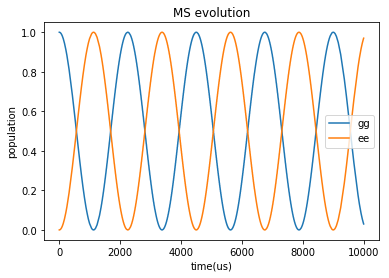

In [90]:
twobright=_np.absolute(ssf.dot(ss.T))**2
nobright=_np.absolute(ssf.dot(dd.T))**2
_plt.plot(ts, twobright, label="gg")
#_plt.plot(ts, onebright, label="ge/eg")
_plt.plot(ts, nobright, label="ee")
_plt.ylabel("population")
_plt.xlabel("time(us)")
_plt.title("MS evolution")
_plt.legend()

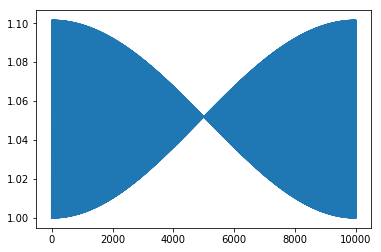

In [97]:
normssf = _np.zeros(points)
for jj in range(points):
    normssf[jj]=scipy.linalg.norm(ssf[jj])
_plt.plot(ts, normssf)

In [92]:
_np.shape(uhat(ts))

ValueError: operands could not be broadcast together with shapes (2000,) (36,36) 

In [93]:
print(smalllowering)

[[0.        +0.j 1.        +0.j 0.        +0.j 1.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j]
 [0.        +0.j 0.        +0.j 1.41421356+0.j 0.        +0.j
  1.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 1.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  1.        +0.j 0.        +0.j 1.41421356+0.j 0.        +0.j
  0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 1.41421356+0.j 0.        +0.j 1.41421356+0.j
  0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  1.41421356+0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 1.        +0.j
  0.        +0.j]
 [0.  

In [94]:
smalllowering-smalllowering.T

array([[ 0.        +0.j,  1.        +0.j,  0.        +0.j,
         1.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j],
       [-1.        +0.j,  0.        +0.j,  1.41421356+0.j,
         0.        +0.j,  1.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j],
       [ 0.        +0.j, -1.41421356+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  1.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j],
       [-1.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  1.        +0.j,  0.        +0.j,
         1.41421356+0.j,  0.        +0.j,  0.        +0.j],
       [ 0.        +0.j, -1.        +0.j,  0.        +0.j,
        -1.        +0.j,  0.        +0.j,  1.41421356+0.j,
         0.        +0.j,  1.41421356+0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j, -1.        +0.j,
         0.        +0.j, -1.41421356+0.j,  0.      

In [95]:
heff= sy.dot(sy.T)

ValueError: x and y must have same first dimension, but have shapes (2000,) and (200,)

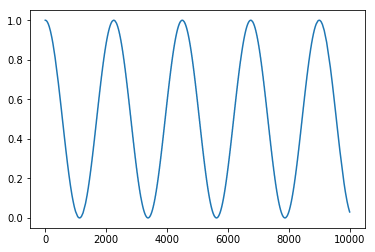

In [96]:
nobrightphase = _np.zeros(points)
onebrightphase = _np.zeros(points)
twobrightphase = _np.zeros(points)
for kk in range(points):
    twobrightphase[kk]=_np.angle(ssf[kk].dot(ss.T))*2*_np.pi/180
    onebrightphase[kk]=_np.angle(ssf[kk].dot(sd.T))*2*_np.pi/180
    nobrightphase[kk]=_np.angle(ssf[kk].dot(dd.T))*2*_np.pi/180
_plt.plot(ts, twobright, label="gg")
_plt.plot(ts, onebright, label="ge/eg")
_plt.plot(ts, nobright, label="ee")
_plt.ylabel("population")
_plt.xlabel("time(us)")
_plt.title("MS evolution")
_plt.legend()

In [ ]:
_plt.plot(_np.real(ssf.dot(ss.T)), _np.imag(ssf.dot(ss.T)))
rs = _np.linspace(0.99,1,10)
thetas=_np.linspace(-0.08, 0, 100)
for r in rs:
    _plt.plot(r*_np.cos(thetas), r*_np.sin(thetas), linestyle="dashed")

In [ ]:
_plt.plot(ts, _np.absolute(ssf.dot(ss.T))**2)